# Exploratory Data Analysis

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.modeling.create_data_split import dummy_encoder

In [2]:
OUT_PATH = Path("..") / ".." / "data" / "data_plain.csv"
CAT_COLS = ["Color", "Gender", "Make", "Race", "VehicleType"]

In [3]:
df = pd.read_csv(OUT_PATH)

In [4]:
# check dimensions
df.shape

(65203, 18)

In [5]:
# look at the head
df.head()

,Belts,Color,Commercial.License,Contributed.To.Accident,Gender,Make,Personal.Injury,Property.Damage,Race,VehicleType,Year,State_MD,Driver_State_MD,DL_State_MD,Fail.Obey.Signals,Speeding,Obey.Police.Doc.Light,Citation
0,0,DARK COLORS,0,0,F,hyundai,0,0,WHITE,Standard Vehicles,2013,0,0,0,0.051476,0.900901,0.047620,1
1,0,LIGHT COLORS,0,0,M,ford,0,0,other,Standard Vehicles,2015,1,1,1,0.037037,0.295922,0.667038,1
2,0,DARK COLORS,0,0,M,toyota,0,0,BLACK,Standard Vehicles,2000,1,1,1,0.888866,0.055566,0.055567,1
3,0,DARK COLORS,0,0,M,honda,0,0,BLACK,Standard Vehicles,2012,1,1,1,0.938627,0.027779,0.033595,1
4,0,DARK COLORS,1,0,M,ford,0,0,WHITE,Standard Vehicles,2010,1,1,1,0.051480,0.900901,0.047620,1


In [6]:
df_numeric = df.select_dtypes(exclude=[object])
# shows correlation of numeric features
corr = df_numeric.corr()
corr

,Belts,Commercial.License,Contributed.To.Accident,Personal.Injury,Property.Damage,Year,State_MD,Driver_State_MD,DL_State_MD,Fail.Obey.Signals,Speeding,Obey.Police.Doc.Light,Citation
Belts,1.000000,-0.006228,0.074687,0.106984,0.073383,0.004423,0.013716,0.011073,0.010080,-0.019254,-0.020531,0.041902,0.044366
Commercial.License,-0.006228,1.000000,0.017521,0.002762,0.024088,-0.035836,-0.025596,-0.027517,-0.046476,0.025708,-0.012306,-0.015383,0.017826
Contributed.To.Accident,0.074687,0.017521,1.000000,0.327294,0.374614,-0.003474,0.000332,0.007416,-0.001042,0.006425,-0.013507,0.006809,0.140977
Personal.Injury,0.106984,0.002762,0.327294,1.000000,-0.015933,0.000589,0.000523,0.004315,-0.001606,0.001923,-0.002406,0.000366,0.101967
Property.Damage,0.073383,0.024088,0.374614,-0.015933,1.000000,-0.010075,-0.000538,0.012146,-0.004810,0.023797,-0.004750,-0.021022,0.126849
Year,0.004423,-0.035836,-0.003474,0.000589,-0.010075,1.000000,-0.040110,-0.049066,-0.028357,-0.144334,0.035014,0.121167,-0.084033
State_MD,0.013716,-0.025596,0.000332,0.000523,-0.000538,-0.040110,1.000000,0.603510,0.590942,0.016697,-0.031758,0.014281,-0.011735
Driver_State_MD,0.011073,-0.027517,0.007416,0.004315,0.012146,-0.049066,0.603510,1.000000,0.807081,0.031877,-0.030246,-0.003768,0.021183
DL_State_MD,0.010080,-0.046476,-0.001042,-0.001606,-0.004810,-0.028357,0.590942,0.807081,1.000000,-0.006644,-0.019276,0.026909,-0.014700
Fail.Obey.Signals,-0.019254,0.025708,0.006425,0.001923,0.023797,-0.144334,0.016697,0.031877,-0.006644,1.000000,-0.551673,-0.523820,0.137976


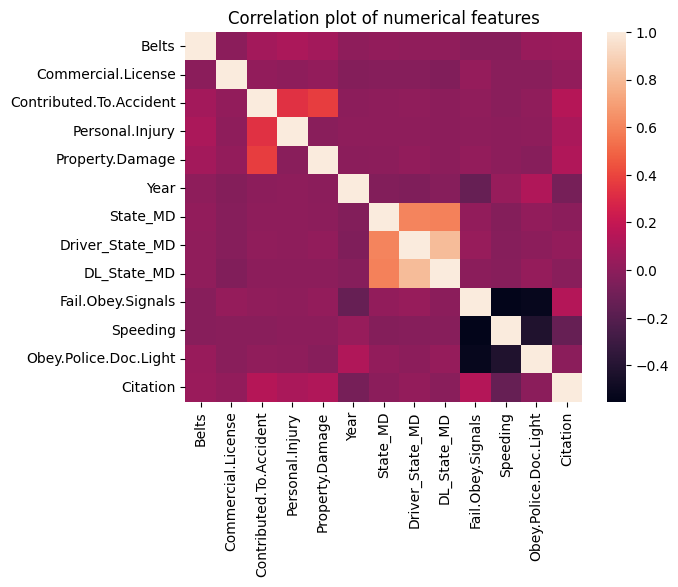

In [7]:
# creates heatmap of correlation of numeric features
sns.heatmap(corr)
plt.title("Correlation plot of numerical features");

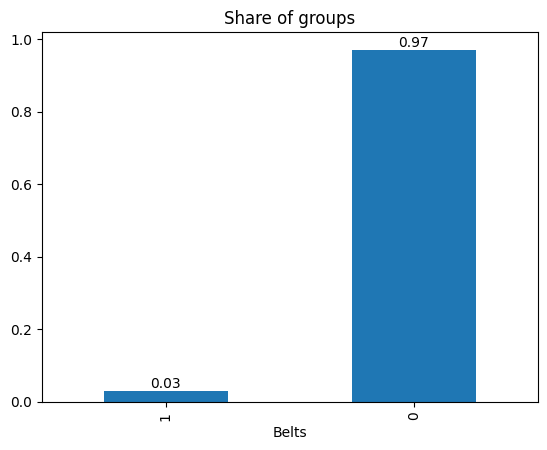

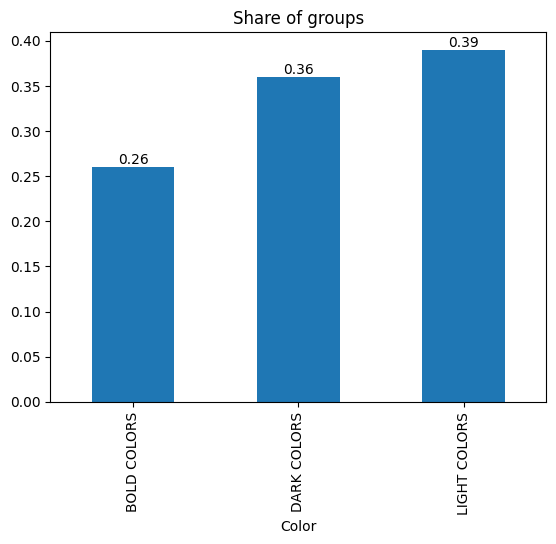

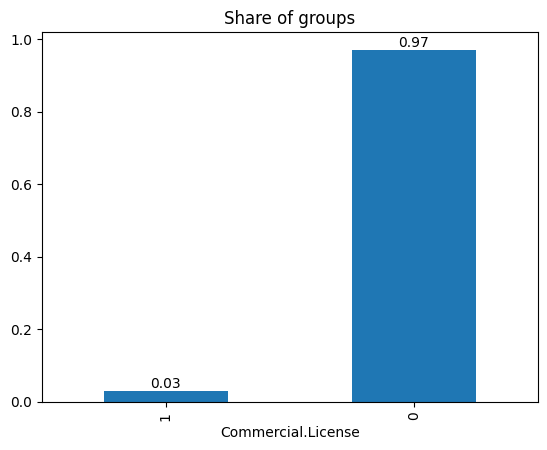

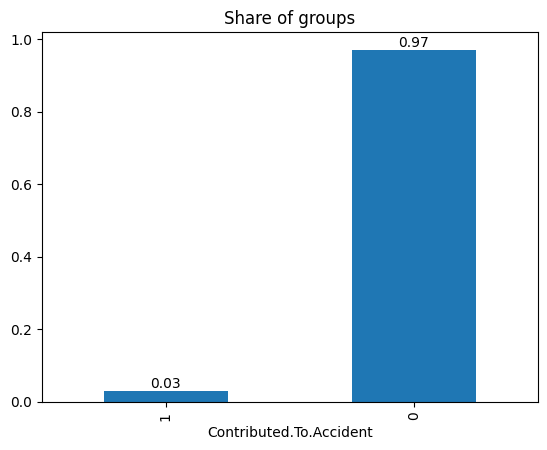

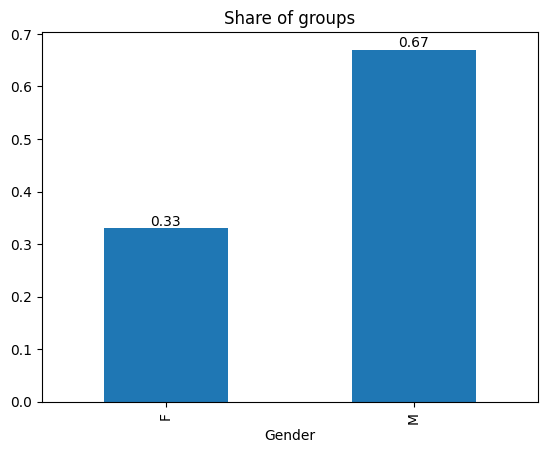

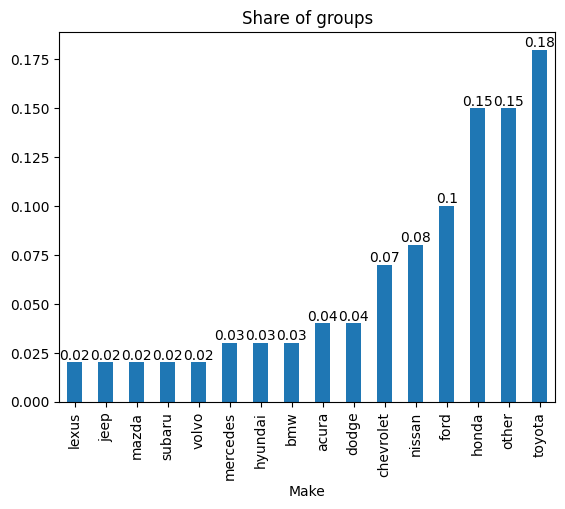

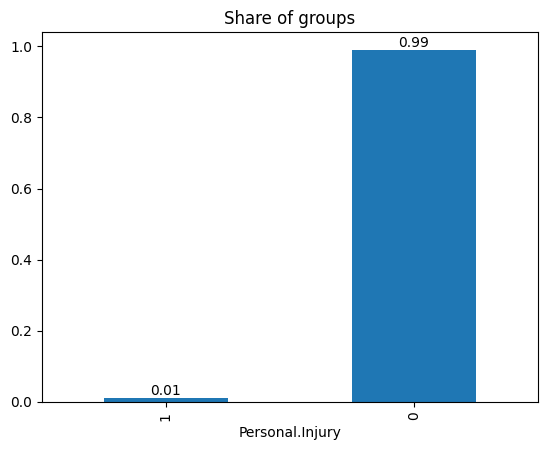

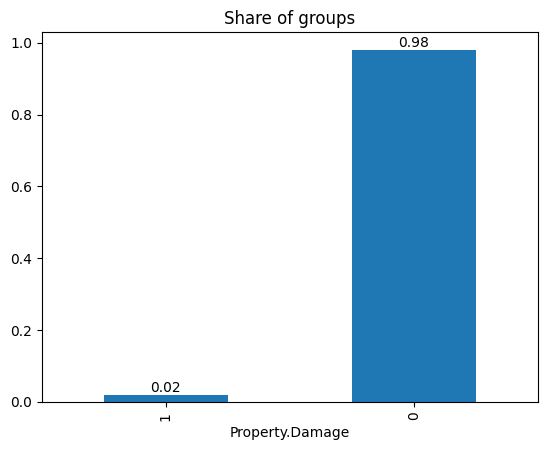

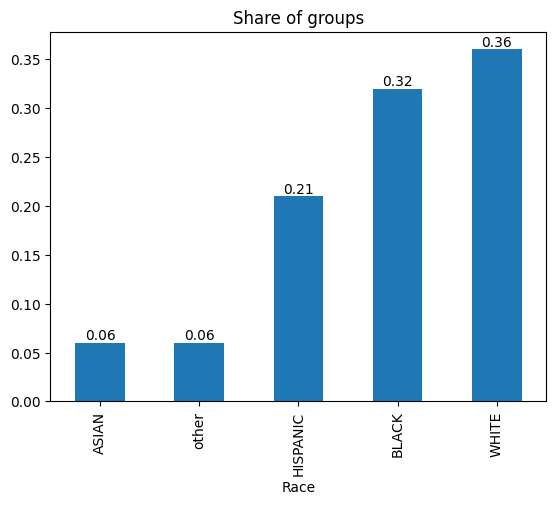

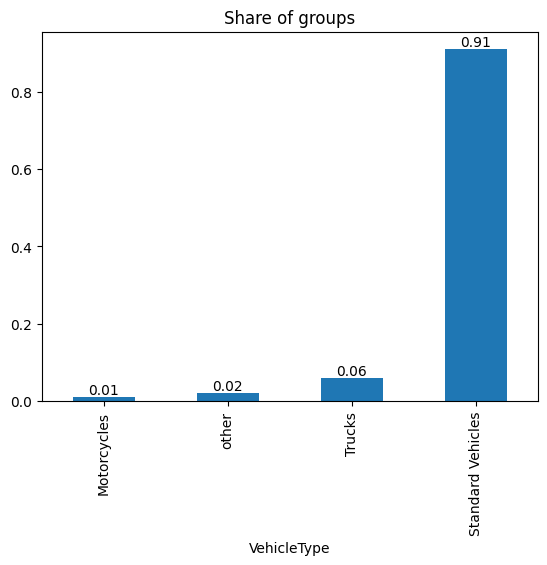

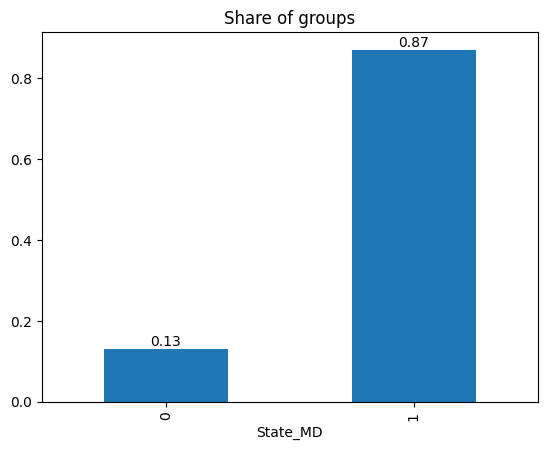

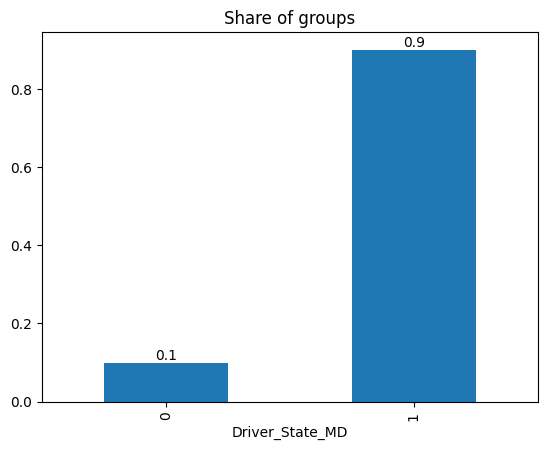

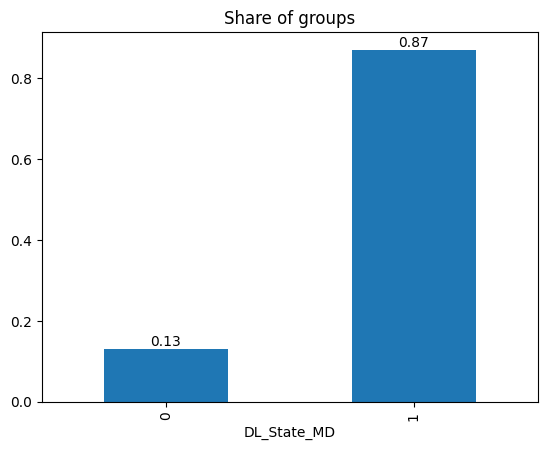

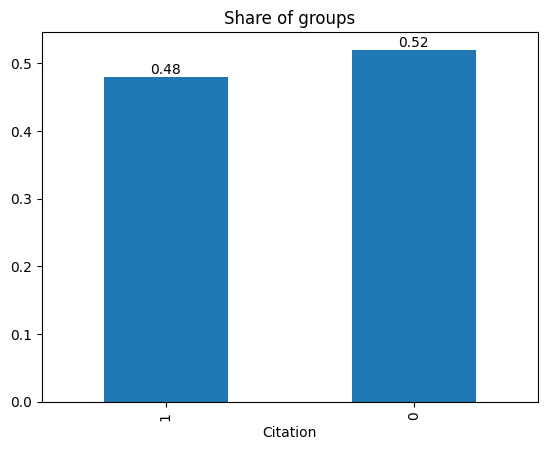

In [8]:
# creates bar plot to show distribution of categories
for col in df.columns:
    if col not in ["Year", "Fail.Obey.Signals", "Speeding", "Obey.Police.Doc.Light"]:
        plt.figure()
        ax = round(df[col].value_counts() / df.shape[0], 2).sort_values().plot(kind="bar")

        for container in ax.containers:
            ax.bar_label(container)
            ax.set_title("Share of groups")

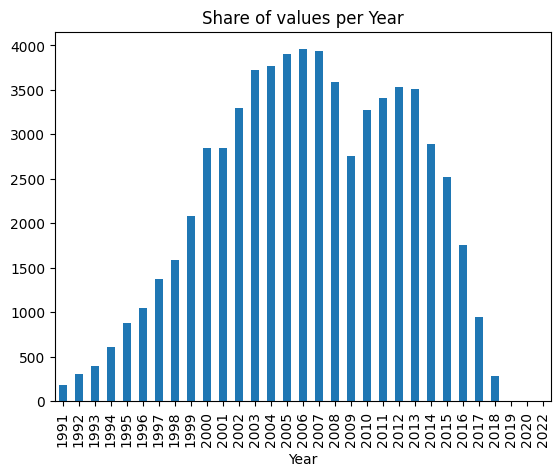

In [9]:
df.Year.value_counts().sort_index().plot(kind="bar")
plt.title("Share of values per Year");

In [10]:
data_dummy = dummy_encoder(df, CAT_COLS)

In [11]:
feature_cols = list(data_dummy.columns)
feature_cols.remove("Citation")
data_dummy = data_dummy[["Citation"] + feature_cols]

In [12]:
data_dummy.shape

(65203, 43)

In [13]:
data_dummy.head()

,Citation,Belts,Commercial.License,Contributed.To.Accident,Personal.Injury,Property.Damage,Year,State_MD,Driver_State_MD,DL_State_MD,...,Make_volvo,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_WHITE,Race_other,VehicleType_Motorcycles,VehicleType_Standard Vehicles,VehicleType_Trucks,VehicleType_other
0,1,0,0,0,0,0,2013,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,2015,1,1,1,...,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,2000,1,1,1,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,2012,1,1,1,...,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,0,0,2010,1,1,1,...,0,0,0,0,1,0,0,1,0,0


In [14]:
corr = data_dummy.corr()

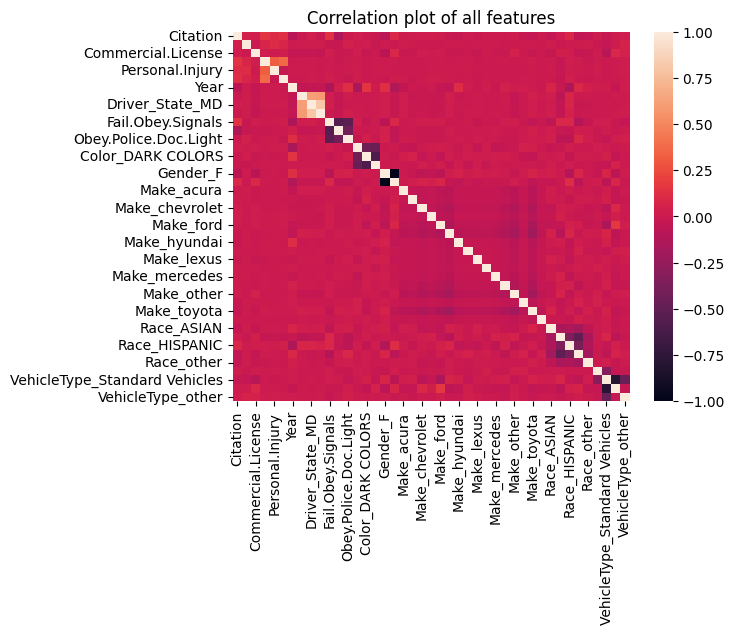

In [15]:
# creates heatmap of correlation of all features
sns.heatmap(corr)
plt.title("Correlation plot of all features");